<a href="https://colab.research.google.com/github/ShrutiRathore15/Prodigy-Infotech-ML-internship/blob/main/House_Price_Prediction_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install opendatasets

In [32]:
import opendatasets as od

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [5]:
od.download("https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shrutirathore15
Your Kaggle Key: ··········


100%|██████████| 199k/199k [00:00<00:00, 75.1MB/s]


Extracting archive ./house-prices-advanced-regression-techniques/house-prices-advanced-regression-techniques.zip to ./house-prices-advanced-regression-techniques


In [6]:
file =('house-prices-advanced-regression-techniques/train.csv')
data = pd.read_csv(file)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
data.drop('Id', axis=1,inplace=True)

In [8]:
data.shape

(1460, 80)

In [9]:
data.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [10]:
data.drop('LotFrontage', axis=1,inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   Alley          91 non-null     object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [15]:
data.duplicated().sum()

0

In [17]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'Ope

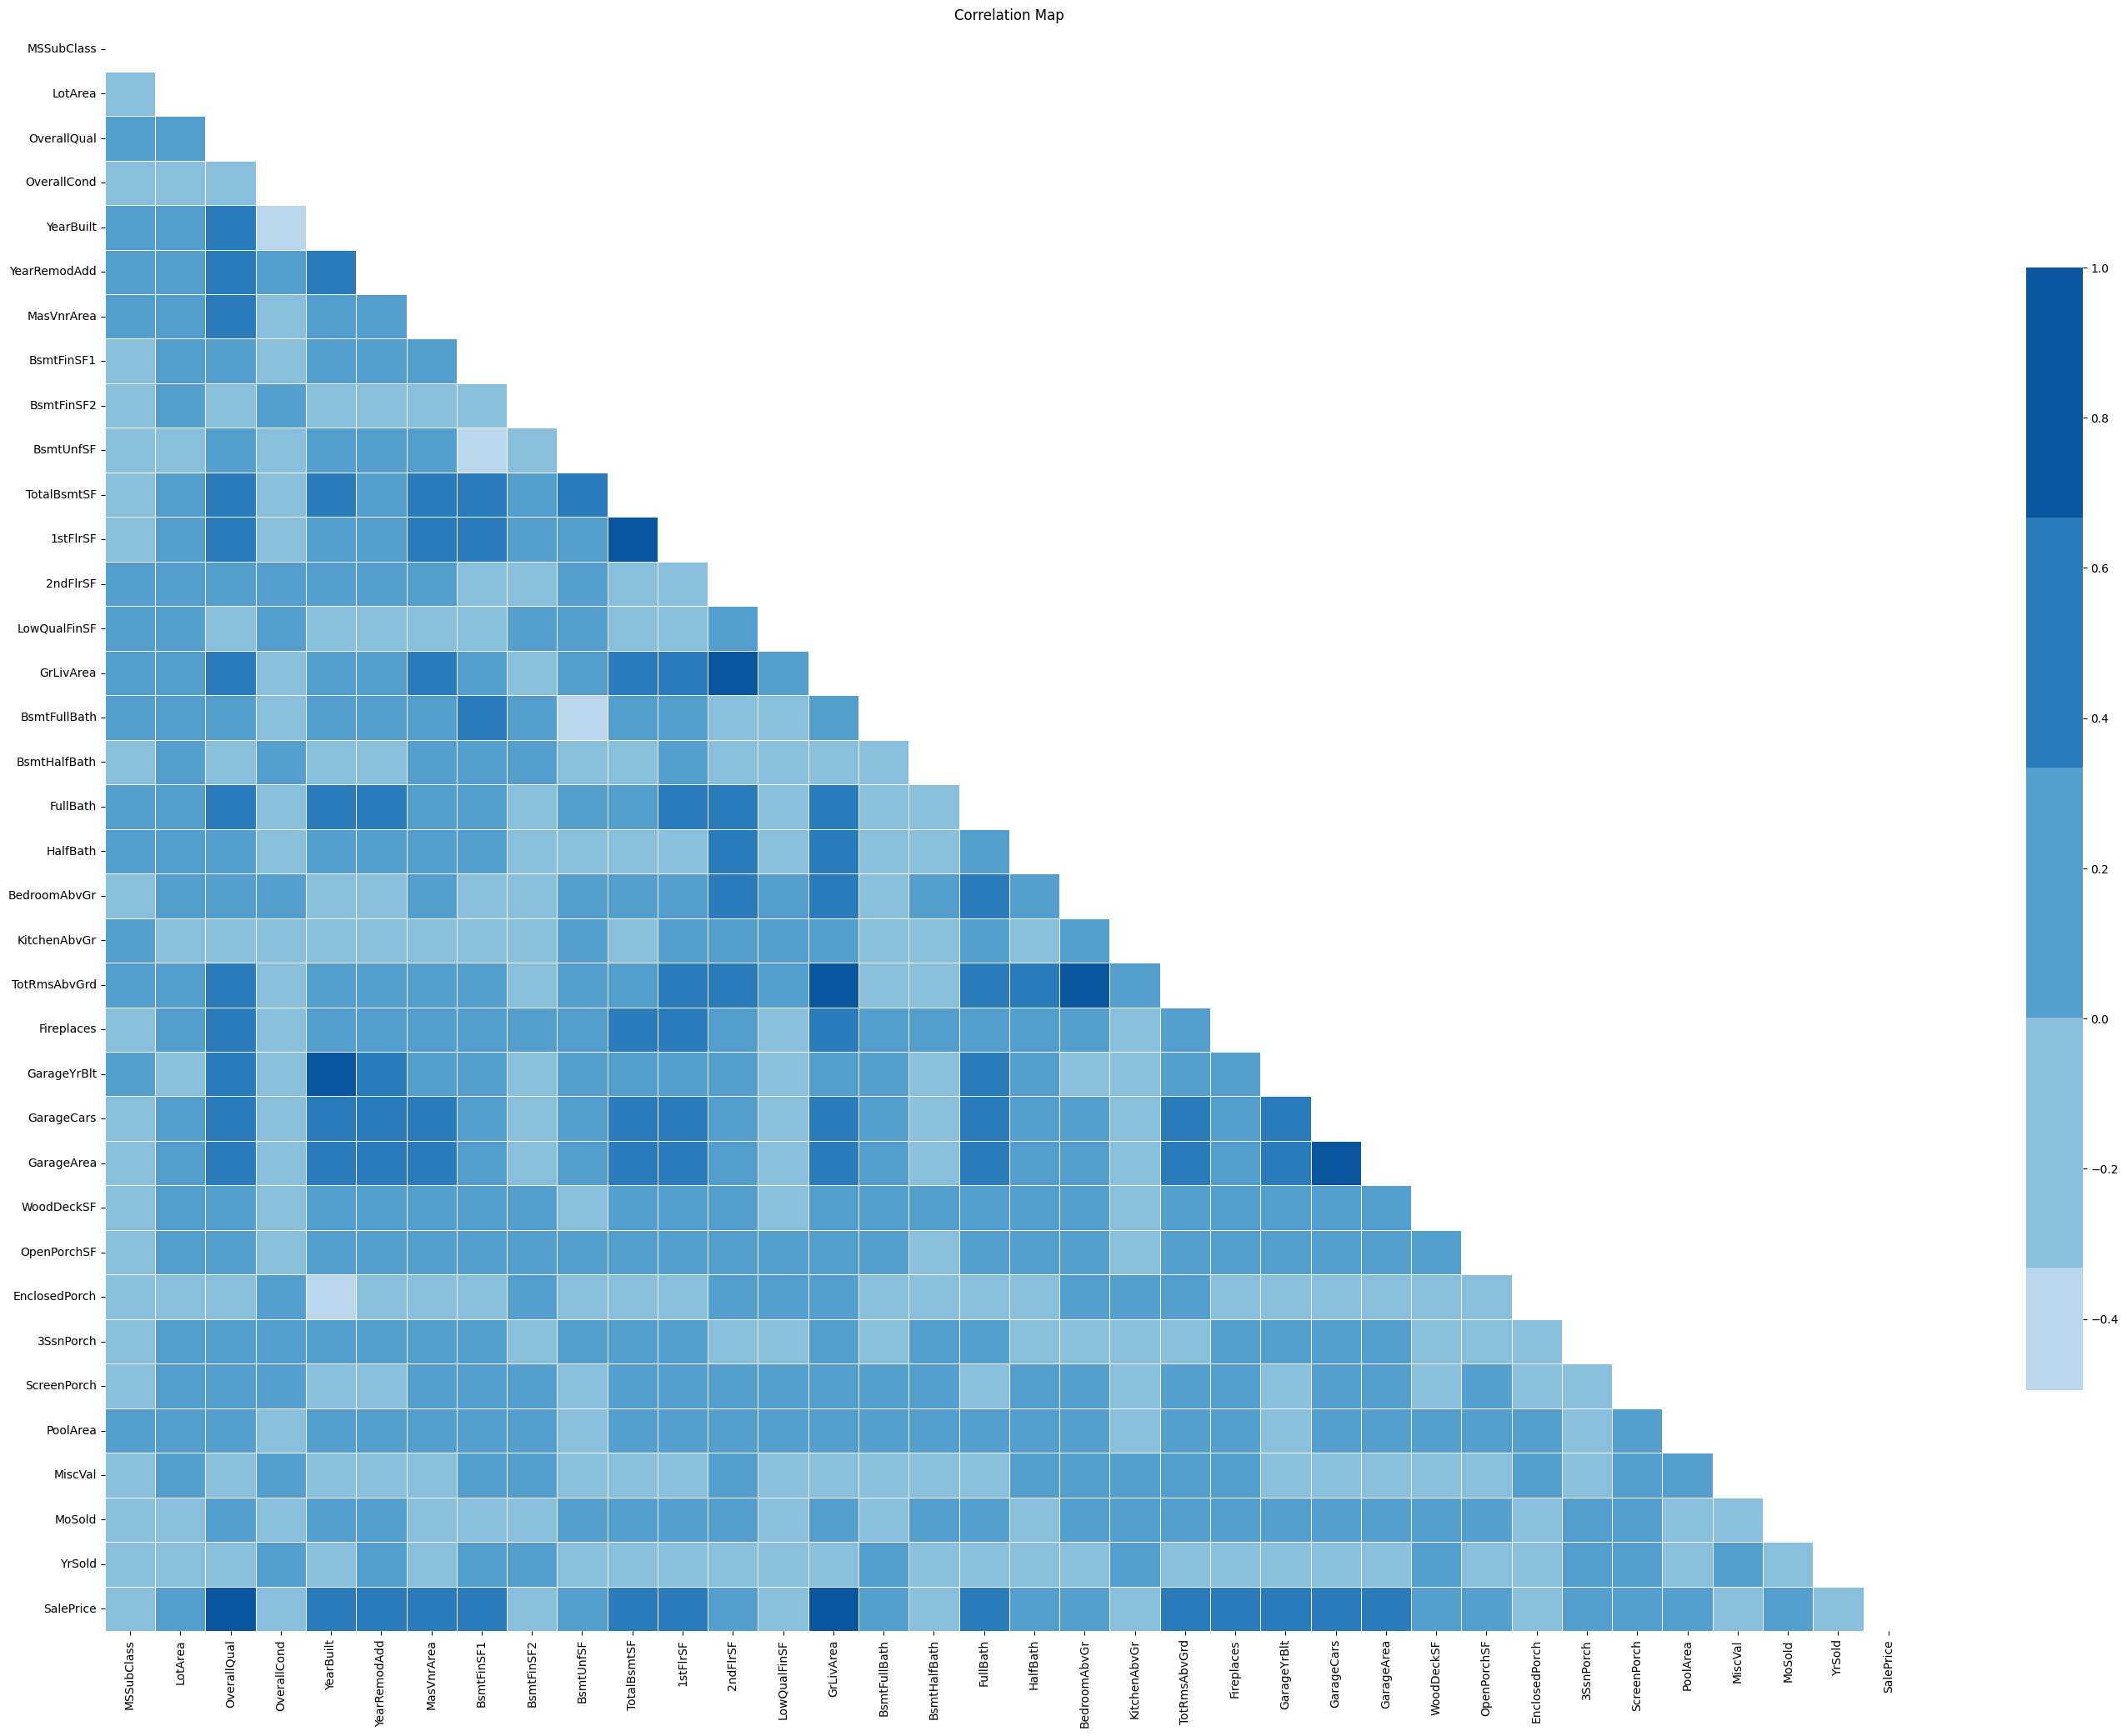

In [14]:
#correlation matrix
fig, axs = plt.subplots(figsize=(35, 25))
mat = data.corr(method = 'pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
sns.heatmap(mat, mask=mask, cmap = sns.color_palette('Blues'), vmax=1, center=0, annot = False, linewidths=.5, cbar_kws={'shrink': .7})
axs.set_title("Correlation Map")
plt.show()

In [20]:
#sorting information numerically
LE = LabelEncoder()
LE.fit(data.CentralAir)
data.CentralAir = LE.transform(data.CentralAir)
data.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Text(0.5, 1.0, 'Scatter Relating SalePrice to LotArea')

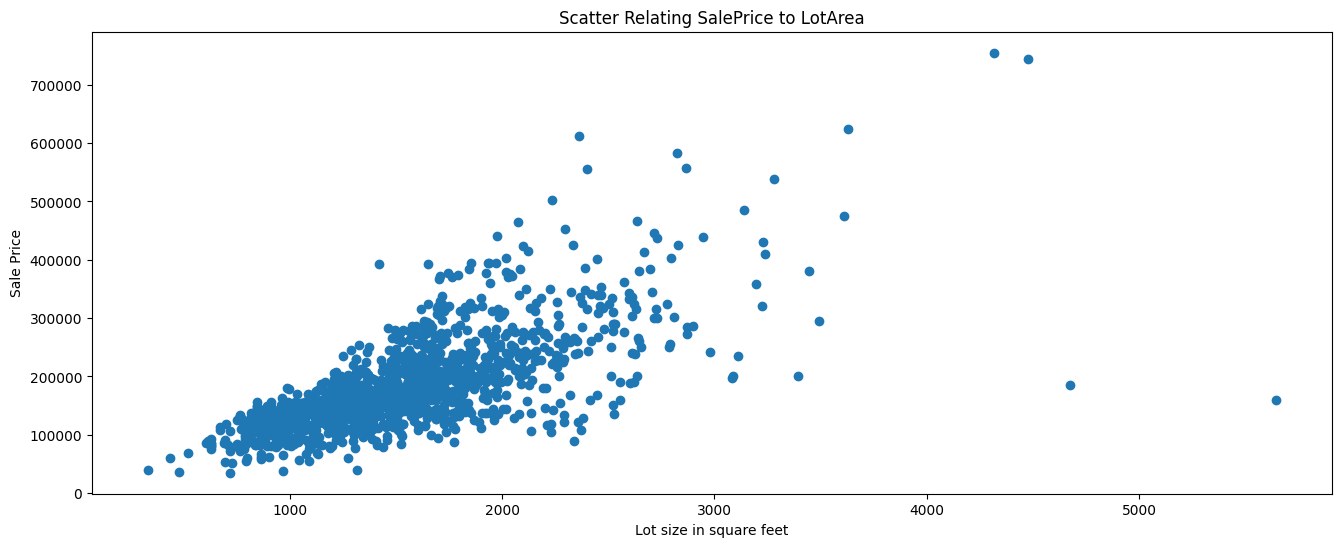

In [22]:
fig, axs = plt.subplots(figsize = (16,6))

axs = plt.scatter(x=data.GrLivArea, y=data.SalePrice)
plt.ylabel('Sale Price')
plt.xlabel('Lot size in square feet')
plt.title('Scatter Relating SalePrice to LotArea')

In [24]:
columns_num = data.select_dtypes(include=['int64','float64']).columns.tolist()
data[columns_num] = data[columns_num].fillna(data[columns_num].mean())

columns_cat = data.select_dtypes(include=['object']).columns.tolist()
data[columns_cat]= data[columns_cat].fillna(data[columns_cat].mode().iloc[0])

In [25]:
le = LabelEncoder()
data[columns_cat] = data[columns_cat].apply(lambda col: le.fit_transform(col.astype(str)))

In [27]:
X = data.drop('SalePrice',axis=1)
y = data['SalePrice']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=33)

In [29]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = lr_model.predict(X_test)

In [34]:
r2 = round(r2_score(y_test,y_pred),5)
print('Coefficient of determination R2: ', r2)

Coefficient of determination R2:  0.68638


Text(0.5, 1.0, 'Scatter chart - Linear regression model')

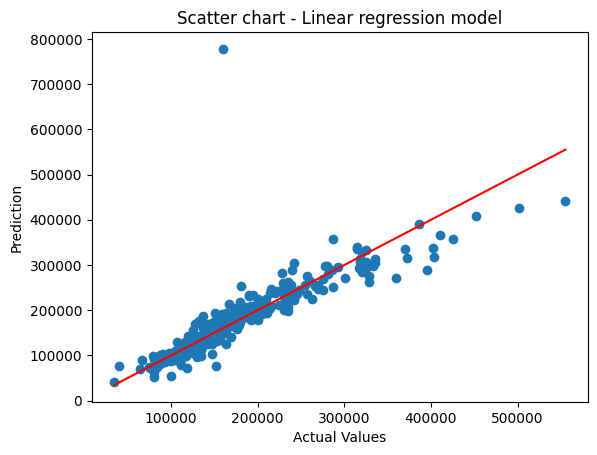

In [35]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-')
plt.xlabel('Actual Values')
plt.ylabel('Prediction')
plt.title('Scatter chart - Linear regression model')